<a href="https://colab.research.google.com/github/MostafaJahanian/Free_Projects/blob/main/rice_image_classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Data From Kaggle

In [1]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download muratkokludataset/rice-image-dataset

 99% 218M/219M [00:10<00:00, 27.7MB/s]
100% 219M/219M [00:10<00:00, 20.9MB/s]


In [ ]:
! unzip rice-image-dataset.zip

## Create a dataset From Images

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import pathlib

In [7]:
tf.random.set_seed(42)

train_data = keras.utils.image_dataset_from_directory('/content/Rice_Image_Dataset',
                                                        validation_split = 0.2,
                                                        subset = 'training', 
                                                        seed = 1,
                                                        shuffle = True,
                                                        batch_size = 50)

test_set = keras.utils.image_dataset_from_directory('/content/Rice_Image_Dataset',
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       seed = 1,
                                                       shuffle = True,
                                                       batch_size = 50)

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


In [8]:
train_data.cardinality().numpy(),  test_set.cardinality().numpy()

(1200, 300)

In [9]:
train_set = train_data.take(1000)
val_set = train_data.skip(1000)

In [10]:
train_set.cardinality().numpy(), val_set.cardinality().numpy()

(1000, 200)

In [11]:
data_dir = pathlib.Path('/content/Rice_Image_Dataset')

for label in train_data.class_names:
  images = list(data_dir.glob(f'{label}/*'))
  print(f'{label} : {len(images)}')

Arborio : 15000
Basmati : 15000
Ipsala : 15000
Jasmine : 15000
Karacadag : 15000


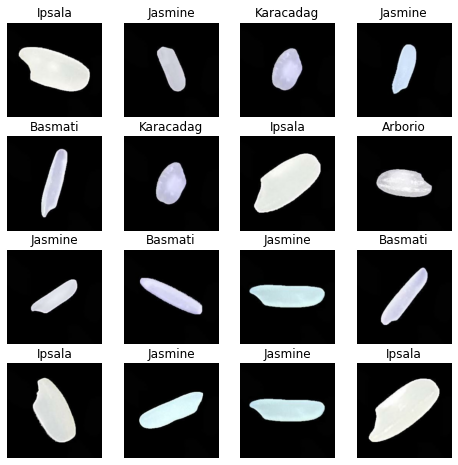

In [13]:
# print random images from the train set
plt.figure(figsize = (8, 8))
for images, labels in train_set.take(1):
  for i in range(16):
    index = random.randint(0, len(images))
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[index].numpy().astype("uint8"))
    plt.title(train_data.class_names[labels[index]])
    plt.axis(False)

## Taining CNNs on the train images

In [14]:
for images_batch, labels_batch in train_set:
  print(images_batch.shape)
  print(labels_batch.shape)
  break

(50, 256, 256, 3)
(50,)


In [15]:
def plot_training_curves(history_df):
  plt.figure(figsize = (13, 4), dpi = 120)
  ax = plt.subplot(1, 2, 1)
  plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
  plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Cross Entropy')
  plt.grid()
  plt.legend()
  ax = plt.subplot(1, 2, 2) 
  plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
  plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid()
  plt.legend()
  plt.show()

In [ ]:
tf.random.set_seed(42)

cnn_1 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])

cnn_1.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_1 = cnn_1.fit(train_set, epochs = 5, validation_data = val_set)

Epoch 1/5
1000/1000 [==============================] - 200s 188ms/step - loss: 0.1922 - accuracy: 0.9667 - val_loss: 0.0750 - val_accuracy: 0.9744
Epoch 2/5
1000/1000 [==============================] - 189s 188ms/step - loss: 0.0324 - accuracy: 0.9890 - val_loss: 0.0467 - val_accuracy: 0.9849
Epoch 3/5
1000/1000 [==============================] - 187s 187ms/step - loss: 0.0279 - accuracy: 0.9901 - val_loss: 0.0496 - val_accuracy: 0.9841
Epoch 4/5
1000/1000 [==============================] - 188s 188ms/step - loss: 0.0189 - accuracy: 0.9933 - val_loss: 0.0380 - val_accuracy: 0.9892
Epoch 5/5
1000/1000 [==============================] - 187s 186ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.0422 - val_accuracy: 0.9886


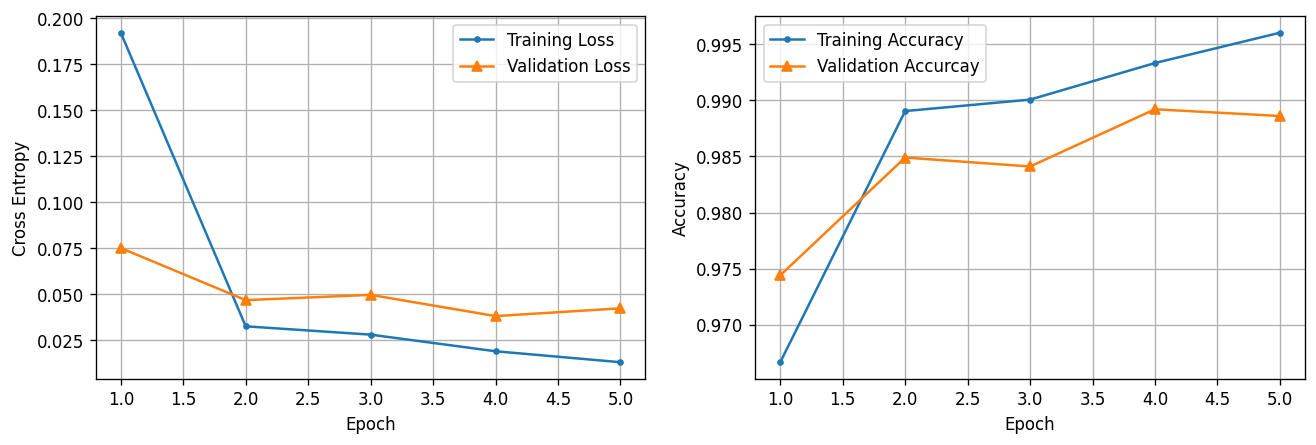

In [ ]:
plot_training_curves(pd.DataFrame(history_1.history))

--- In the plots above, there is a minor tendency to overfitting. However, because of the few epochs that the model has been trained, this issue might not be significant in longer runs.

In [ ]:
tf.random.set_seed(42)

cnn_2 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])

cnn_2.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_2 = cnn_2.fit(train_set, epochs = 20, validation_data = val_set)

Epoch 1/20
1000/1000 [==============================] - 189s 188ms/step - loss: 0.1799 - accuracy: 0.9674 - val_loss: 0.0511 - val_accuracy: 0.9831
Epoch 2/20
1000/1000 [==============================] - 186s 185ms/step - loss: 0.0333 - accuracy: 0.9889 - val_loss: 0.0397 - val_accuracy: 0.9874
Epoch 3/20
1000/1000 [==============================] - 187s 187ms/step - loss: 0.0294 - accuracy: 0.9900 - val_loss: 0.0616 - val_accuracy: 0.9797
Epoch 4/20
1000/1000 [==============================] - 187s 187ms/step - loss: 0.0192 - accuracy: 0.9934 - val_loss: 0.0356 - val_accuracy: 0.9898
Epoch 5/20
1000/1000 [==============================] - 189s 188ms/step - loss: 0.0130 - accuracy: 0.9951 - val_loss: 0.0481 - val_accuracy: 0.9869
Epoch 6/20
1000/1000 [==============================] - 187s 187ms/step - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.0518 - val_accuracy: 0.9885
Epoch 7/20
1000/1000 [==============================] - 187s 187ms/step - loss: 0.0087 - accuracy: 0.9970 - val_

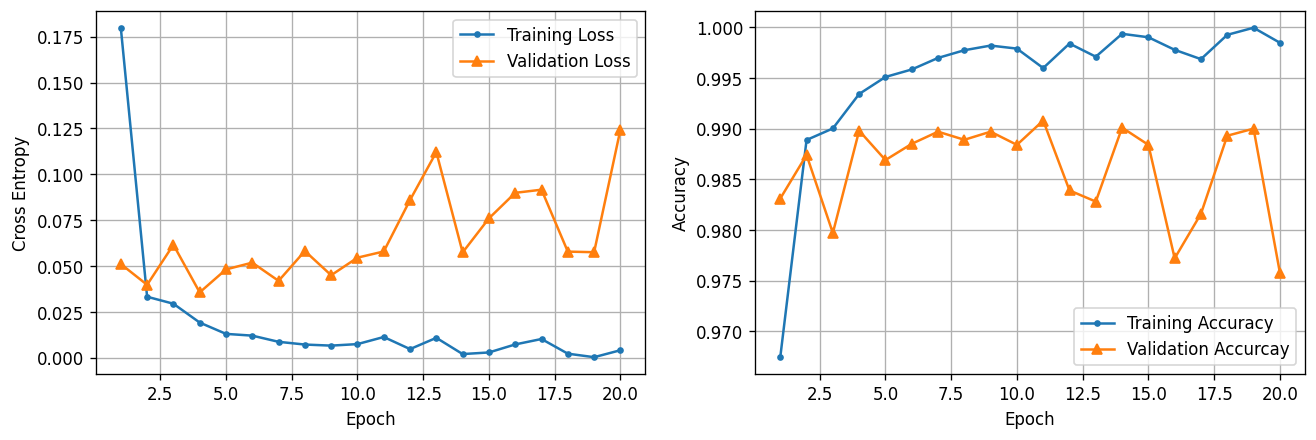

In [ ]:
plot_training_curves(pd.DataFrame(history_2.history))

--- Inceasing epochs amplified the tendency of the model for overfitting. After 10 epoch, both loss and accuracy curves of the validation set flactuated further from those of the training set. Aiming to solve this issue, two dropout layers are being added to the model.

In [ ]:
tf.random.set_seed(42)

cnn_3 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dropout(rate = 0.3),
    layers.Dense(500, activation = 'relu'),
    layers.Dropout(rate = 0.2),
    layers.Dense(5, activation = 'softmax')
])

cnn_3.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_3 = cnn_3.fit(train_set, epochs = 20, validation_data = val_set)

Epoch 1/20
1000/1000 [==============================] - 196s 195ms/step - loss: 0.1402 - accuracy: 0.9676 - val_loss: 0.0385 - val_accuracy: 0.9886
Epoch 2/20
1000/1000 [==============================] - 192s 192ms/step - loss: 0.0462 - accuracy: 0.9849 - val_loss: 0.0572 - val_accuracy: 0.9827
Epoch 3/20
1000/1000 [==============================] - 193s 193ms/step - loss: 0.0276 - accuracy: 0.9902 - val_loss: 0.0514 - val_accuracy: 0.9858
Epoch 4/20
1000/1000 [==============================] - 193s 193ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0650 - val_accuracy: 0.9789
Epoch 5/20
1000/1000 [==============================] - 192s 192ms/step - loss: 0.0177 - accuracy: 0.9940 - val_loss: 0.0397 - val_accuracy: 0.9897
Epoch 6/20
1000/1000 [==============================] - 192s 192ms/step - loss: 0.0163 - accuracy: 0.9943 - val_loss: 0.0405 - val_accuracy: 0.9896
Epoch 7/20
1000/1000 [==============================] - 192s 192ms/step - loss: 0.0100 - accuracy: 0.9968 - val_

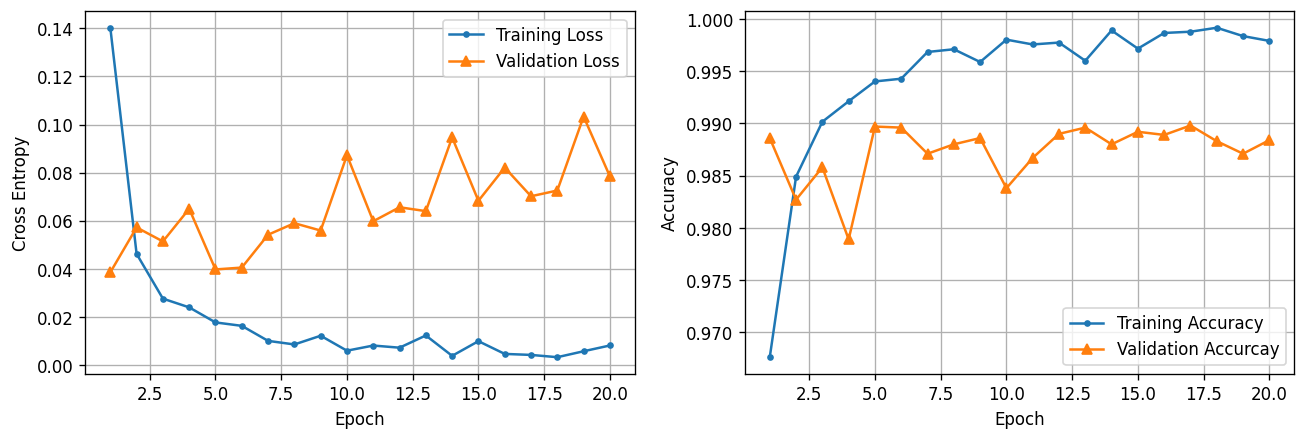

In [ ]:
plot_training_curves(pd.DataFrame(history_3.history))

--- Although the model shows more stability comparing to the previous model which does not have dropout layers, the improvement is no way significant. Thus, I try another model with augmentation layers but without dropout layers to check for their effect in isolation. Also, the number of epochs will be set to 15 as it seems that the model does no change much after 15 epochs.

In [16]:
tf.random.set_seed(42)

cnn_4 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip(),
    layers.RandomContrast(0.3),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])

cnn_4.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_4 = cnn_4.fit(train_set, epochs = 15, validation_data = val_set)

Epoch 1/15
1000/1000 [==============================] - 205s 192ms/step - loss: 0.2793 - accuracy: 0.9623 - val_loss: 0.0637 - val_accuracy: 0.9790
Epoch 2/15
1000/1000 [==============================] - 194s 194ms/step - loss: 0.0522 - accuracy: 0.9837 - val_loss: 0.0705 - val_accuracy: 0.9781
Epoch 3/15
1000/1000 [==============================] - 193s 193ms/step - loss: 0.0500 - accuracy: 0.9840 - val_loss: 0.0329 - val_accuracy: 0.9892
Epoch 4/15
1000/1000 [==============================] - 193s 192ms/step - loss: 0.0369 - accuracy: 0.9881 - val_loss: 0.0298 - val_accuracy: 0.9907
Epoch 5/15
1000/1000 [==============================] - 192s 191ms/step - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.0464 - val_accuracy: 0.9859
Epoch 6/15
1000/1000 [==============================] - 192s 192ms/step - loss: 0.0358 - accuracy: 0.9878 - val_loss: 0.0274 - val_accuracy: 0.9911
Epoch 7/15
1000/1000 [==============================] - 193s 193ms/step - loss: 0.0372 - accuracy: 0.9896 - val_

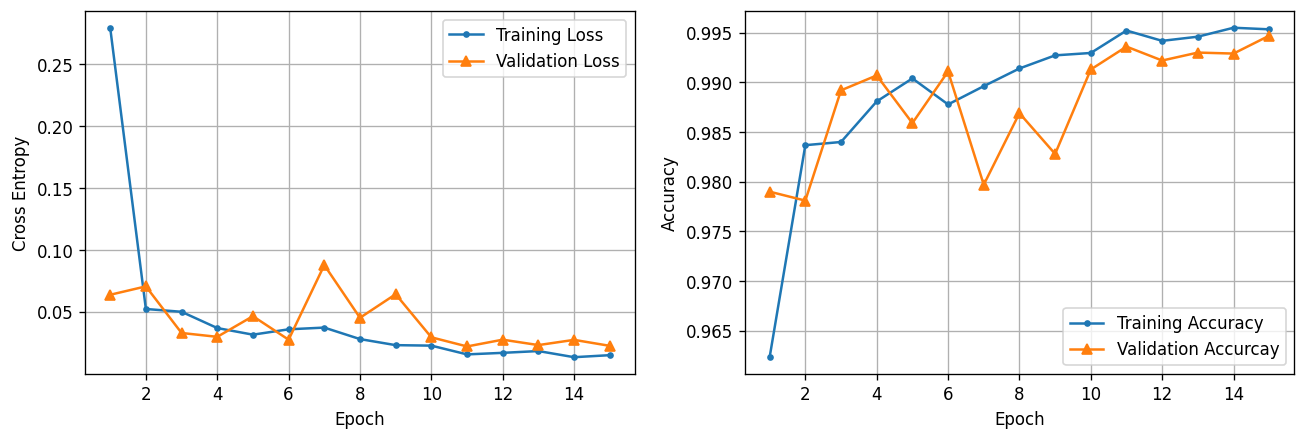

In [17]:
plot_training_curves(pd.DataFrame(history_4.history))

--- Adding augmetation layers helped with achieving much better results in comparison with former models. It seems with these layers, overfitting is not much of a problem anymore. As a result, retaining the structure of this model, some layers will be added to see if better resutls are attainable.

In [18]:
tf.random.set_seed(42)

cnn_5 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip(),
    layers.RandomContrast(0.3),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])

cnn_5.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_5 = cnn_5.fit(train_set, epochs = 15, validation_data = val_set)

Epoch 1/15
1000/1000 [==============================] - 193s 191ms/step - loss: 0.1545 - accuracy: 0.9585 - val_loss: 0.0560 - val_accuracy: 0.9813
Epoch 2/15
1000/1000 [==============================] - 190s 189ms/step - loss: 0.0578 - accuracy: 0.9816 - val_loss: 0.0518 - val_accuracy: 0.9835
Epoch 3/15
1000/1000 [==============================] - 192s 191ms/step - loss: 0.0539 - accuracy: 0.9827 - val_loss: 0.0294 - val_accuracy: 0.9909
Epoch 4/15
1000/1000 [==============================] - 190s 190ms/step - loss: 0.0441 - accuracy: 0.9854 - val_loss: 0.0774 - val_accuracy: 0.9725
Epoch 5/15
1000/1000 [==============================] - 189s 189ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.1178 - val_accuracy: 0.9605
Epoch 6/15
1000/1000 [==============================] - 189s 189ms/step - loss: 0.0323 - accuracy: 0.9892 - val_loss: 0.0180 - val_accuracy: 0.9941
Epoch 7/15
1000/1000 [==============================] - 190s 190ms/step - loss: 0.0222 - accuracy: 0.9930 - val_

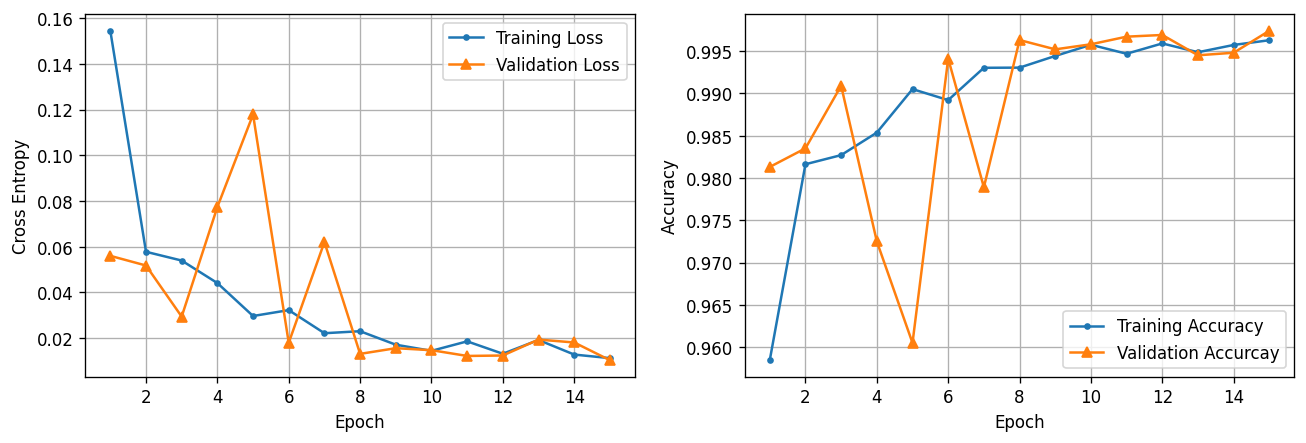

In [19]:
plot_training_curves(pd.DataFrame(history_5.history))

--- Comparing the plots of the latest model with those of the previous one, it seems that the performance of the model improved with the price of losing consistency to some extent. Aiming to check the validity of this comparison, plots of both models are being drawn.

In [1]:
history_4_df = pd.DataFrame(history_4.history)
history_5_df = pd.DataFrame(history_5.history)

plt.plot(range(1, 16), history_4_df['val_loss'], label = 'CNN 4')
plt.plot(range(1, 16), history_5_df['val_loss'], label = 'CNN 5')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.legend()
plt.grid()
plt.show()

NameError: ignored